In [9]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [17]:
probs = pd.read_csv("transformer_raw_pred.csv")
probs.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-7.167737,-7.236745,-7.206699,-7.148637,-7.146410,-7.170108
std,4.493088,4.466621,4.478466,4.486038,4.495893,4.490035
min,-14.866518,-15.114944,-14.763812,-14.515608,-14.460797,-14.625731
25%,-10.715715,-10.758498,-10.732272,-10.694990,-10.710078,-10.712104
50%,-8.307705,-8.369462,-8.354556,-8.276172,-8.275436,-8.301431
75%,-4.463685,-4.560529,-4.523985,-4.433231,-4.422577,-4.474026
max,10.093478,9.858159,10.054005,10.095973,10.024404,10.190435


In [18]:
toxic = probs['toxic']

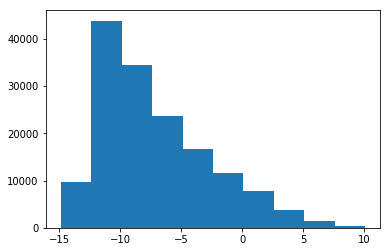

In [19]:
plt.hist(toxic, bins=10)
plt.show()

In [20]:
toxic = torch.tensor(toxic)

In [21]:
toxic

tensor([  6.3211,  -0.1419,   4.9952,  ..., -10.5046,  -8.7984, -12.4203])

In [22]:
logits = toxic.sigmoid()

In [23]:
logit = logits.numpy()

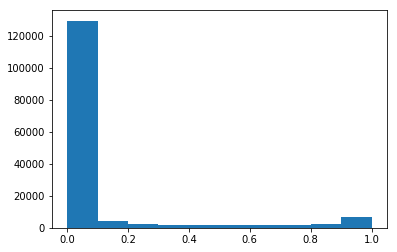

In [24]:
plt.hist(logit, bins=10)
plt.show()

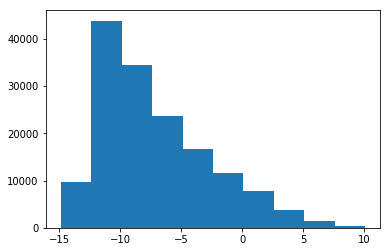

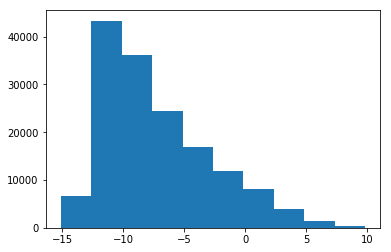

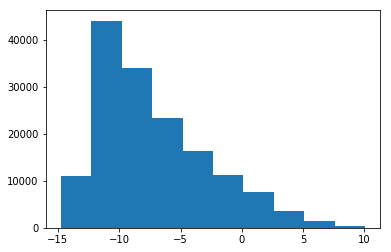

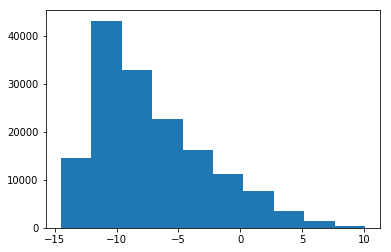

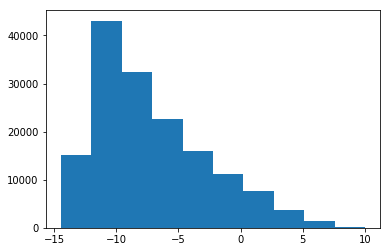

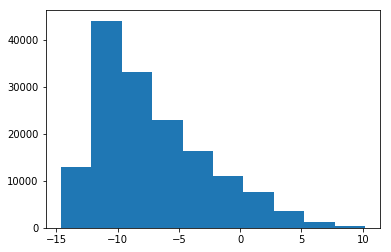

In [29]:
output_df = pd.read_csv("../data/sample_submission.csv")
for col in probs.columns:
    col_data = probs[col]
    plt.hist(col_data)
    plt.show()

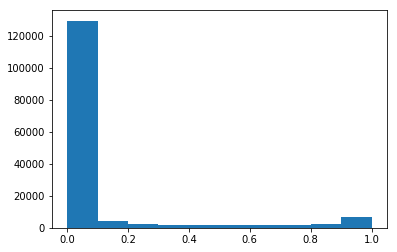

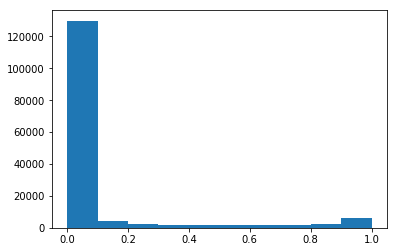

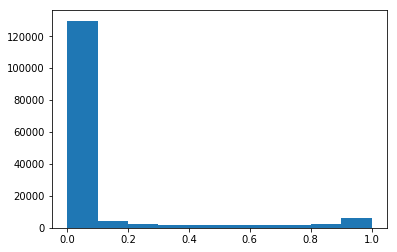

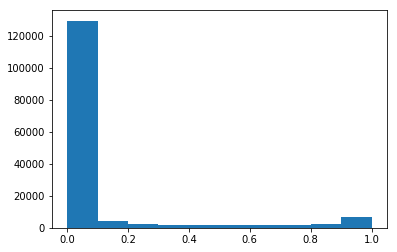

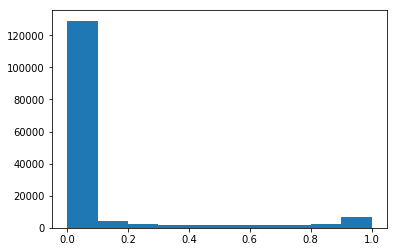

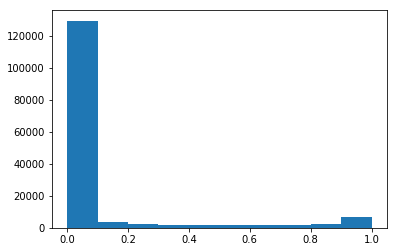

In [28]:
output_df = pd.read_csv("../data/sample_submission.csv")
for col in probs.columns:
    col_data = probs[col]
    col_tensor = torch.tensor(col_data)
    col_tensor = col_tensor.sigmoid()
    plt.hist(col_tensor.numpy())
    plt.show()
#     preds = (col_tensor > 0.1) * 1
#     output_df[col] = preds.numpy()
# output_df.to_csv("output.csv", index=False)

In [27]:
output_df.to_csv("output.csv", index=False)